In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report


In [3]:
data = pd.read_csv(r"C:\Users\Robin\Desktop\Statistics\titanic_train.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.shape

(891, 12)

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

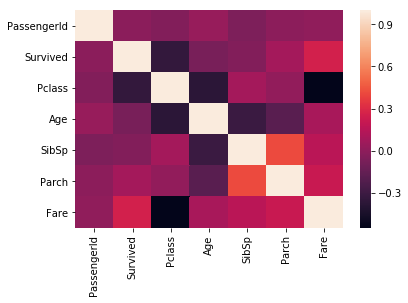

In [11]:
sns.heatmap(data.corr())

In [12]:
data.drop(['Name','PassengerId','SibSp','Parch','Ticket','Cabin', 'Embarked'],axis='columns',inplace= True)

In [13]:
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [14]:
target = data.Survived

In [15]:
inputs = data.drop('Survived',axis = 'columns')

In [17]:
inputs.head(3)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250


In [18]:
dummies = pd.get_dummies(inputs.Sex)

In [19]:
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [20]:
inputs = pd.concat([inputs,dummies],axis = 'columns')

In [21]:
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [22]:
inputs.drop('Sex',axis = 'columns',inplace = True)

In [23]:
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [24]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [25]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [26]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [28]:
inputs.head(6)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1


In [29]:
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [30]:
len(X_train)

712

In [31]:
len(X_test)

179

In [32]:
len(inputs)

891

In [33]:
X_train

,Pclass,Age,Fare,female,male
884,3,25.000000,7.0500,0,1
156,3,16.000000,7.7333,1,0
132,3,47.000000,14.5000,1,0
635,2,28.000000,13.0000,1,0
889,1,26.000000,30.0000,0,1
582,2,54.000000,26.0000,0,1
120,2,21.000000,73.5000,0,1
517,3,29.699118,24.1500,0,1
457,1,29.699118,51.8625,1,0
584,3,29.699118,8.7125,0,1


In [34]:
model = GaussianNB()

In [36]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
model.score(X_test,y_test)

0.8491620111731844

In [39]:
predicted = model.predict(X_test)

In [40]:
model.predict_proba(X_test)

array([[1.88930257e-03, 9.98110697e-01],
       [1.89733826e-03, 9.98102662e-01],
       [9.85138255e-01, 1.48617446e-02],
       [9.85167127e-01, 1.48328727e-02],
       [9.85075502e-01, 1.49244981e-02],
       [9.85047835e-01, 1.49521648e-02],
       [8.85873448e-01, 1.14126552e-01],
       [5.53067659e-01, 4.46932341e-01],
       [9.64469220e-01, 3.55307803e-02],
       [7.13238453e-02, 9.28676155e-01],
       [9.67589157e-01, 3.24108429e-02],
       [9.82418788e-01, 1.75812119e-02],
       [9.85049210e-01, 1.49507898e-02],
       [9.84927915e-01, 1.50720850e-02],
       [9.85048067e-01, 1.49519334e-02],
       [1.44919054e-01, 8.55080946e-01],
       [3.28222839e-02, 9.67177716e-01],
       [9.82532606e-01, 1.74673940e-02],
       [6.51238463e-02, 9.34876154e-01],
       [9.80551070e-01, 1.94489299e-02],
       [9.83043799e-01, 1.69562010e-02],
       [9.84179812e-01, 1.58201880e-02],
       [8.95567168e-03, 9.91044328e-01],
       [4.02427510e-02, 9.59757249e-01],
       [6.812898

In [41]:
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[103  13]
 [ 14  49]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       116
           1       0.79      0.78      0.78        63

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179

